In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
# Đường dẫn thư mục chứa ảnh panorama
image_dir = r"C:\Users\Public\panorama_sift_three_pictures"

# Đọc ảnh màu từ các file
left_img   = cv2.imread(f"{image_dir}\img_left_2.jpg")
middle_img = cv2.imread(f"{image_dir}\img_middle_2.jpg")
right_img  = cv2.imread(f"{image_dir}\img_right_2.jpg")

# Kiểm tra kích thước ảnh đã đọc
print("Kích thước ảnh trái:", left_img.shape)
print("Kích thước ảnh giữa:", middle_img.shape)
print("Kích thước ảnh phải:", right_img.shape)


Kích thước ảnh trái: (1360, 2048, 3)
Kích thước ảnh giữa: (1360, 2048, 3)
Kích thước ảnh phải: (1360, 2048, 3)


Số lượng keypoint SIFT trên ảnh trái: 7722


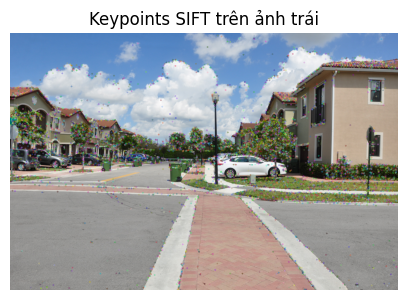

In [12]:
import matplotlib.pyplot as plt

# Tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Ảnh bên trái: chuyển sang grayscale và phát hiện keypoint
gray_left = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
kp_left, des_left = sift.detectAndCompute(gray_left, None)
print(f"Số lượng keypoint SIFT trên ảnh trái: {len(kp_left)}")

# Vẽ các keypoint SIFT lên ảnh màu
img_left_keypoints = cv2.drawKeypoints(left_img, kp_left, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Hiển thị ảnh với keypoints
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_left_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoints SIFT trên ảnh trái")
plt.axis('off')
plt.show()


Số lượng keypoint SIFT trên ảnh giữa: 7188


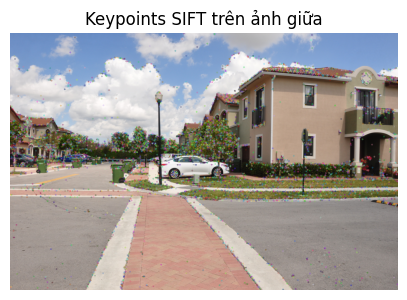

In [13]:
# Ảnh ở giữa: phát hiện keypoint SIFT
gray_middle = cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY)
kp_middle, des_middle = sift.detectAndCompute(gray_middle, None)
print(f"Số lượng keypoint SIFT trên ảnh giữa: {len(kp_middle)}")

# Vẽ keypoint lên ảnh giữa
img_mid_keypoints = cv2.drawKeypoints(middle_img, kp_middle, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Hiển thị ảnh giữa với các keypoint SIFT
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_mid_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoints SIFT trên ảnh giữa")
plt.axis('off')
plt.show()


Số lượng keypoint SIFT trên ảnh phải: 6970


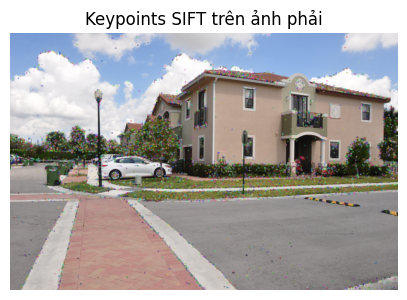

In [14]:
# Ảnh bên phải: phát hiện keypoint SIFT
gray_right = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)
kp_right, des_right = sift.detectAndCompute(gray_right, None)
print(f"Số lượng keypoint SIFT trên ảnh phải: {len(kp_right)}")

# Vẽ keypoint lên ảnh phải
img_right_keypoints = cv2.drawKeypoints(right_img, kp_right, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Hiển thị ảnh phải với các keypoint SIFT
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_right_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoints SIFT trên ảnh phải")
plt.axis('off')
plt.show()


Số match tốt giữa ảnh trái và ảnh giữa: 3097
Homography (ảnh trái -> ảnh giữa):
[[ 1.22034643e+00 -7.38252697e-03 -4.39410350e+02]
 [ 6.78093182e-02  1.11653699e+00 -7.35853278e+01]
 [ 1.10729555e-04 -8.78970199e-06  1.00000000e+00]]


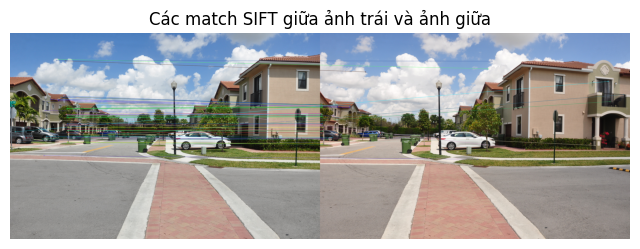

In [15]:
# Tìm match giữa ảnh trái và ảnh giữa
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Tìm 2 match gần nhất cho mỗi descriptor của ảnh trái
matches_left_mid = bf.knnMatch(des_left, des_middle, k=2)

# Áp dụng Lowe's ratio test để lọc match tốt
good_matches_lm = []
ratio_thresh = 0.75
for m, n in matches_left_mid:
    if m.distance < ratio_thresh * n.distance:
        good_matches_lm.append(m)
print(f"Số match tốt giữa ảnh trái và ảnh giữa: {len(good_matches_lm)}")

# Tính homography sử dụng các match tốt
if len(good_matches_lm) >= 4:
    # Lấy tọa độ các điểm match
    pts_left  = [kp_left[m.queryIdx].pt for m in good_matches_lm]
    pts_mid   = [kp_middle[m.trainIdx].pt for m in good_matches_lm]
    pts_left  = np.array(pts_left, dtype=np.float32)
    pts_mid   = np.array(pts_mid, dtype=np.float32)
    # Tính H (homography) sao cho H * (point_left) = point_middle
    H_left_to_mid, mask = cv2.findHomography(pts_left, pts_mid, cv2.RANSAC)
    print("Homography (ảnh trái -> ảnh giữa):")
    print(H_left_to_mid)
else:
    H_left_to_mid = None
    print("Không đủ match để tính homography!")
    
# Vẽ 50 match tốt đầu tiên để minh họa
matches_draw = good_matches_lm[:50]  # lấy 50 match đầu (nếu ít hơn 50 thì lấy tất cả)
match_img = cv2.drawMatches(left_img, kp_left, middle_img, kp_middle, matches_draw, None, 
                            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Chuyển ảnh match BGR->RGB và hiển thị
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("Các match SIFT giữa ảnh trái và ảnh giữa")
plt.axis('off')
plt.show()


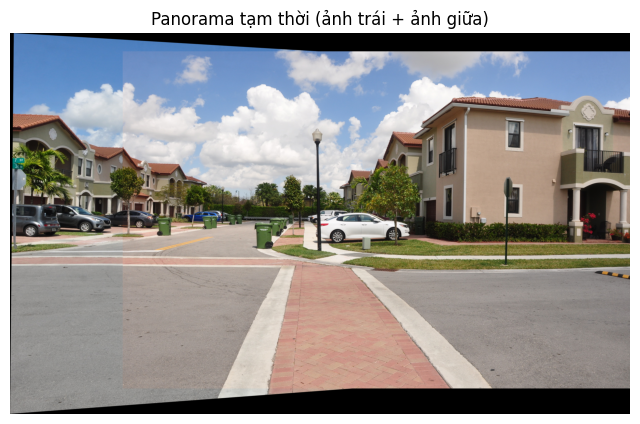

In [16]:

# Nếu tính được homography H_left_to_mid, tiến hành warp
if H_left_to_mid is not None:
    # Kích thước ảnh
    h_left, w_left = left_img.shape[:2]
    h_mid,  w_mid  = middle_img.shape[:2]
    
    # Tọa độ 4 góc của ảnh trái và ảnh giữa trong hệ tọa độ gốc của chúng
    corners_left = np.float32([[0,0], [w_left,0], [0,h_left], [w_left, h_left]]).reshape(-1,1,2)
    corners_mid  = np.float32([[0,0], [w_mid,0], [0,h_mid], [w_mid, h_mid]]).reshape(-1,1,2)
    
    # Chuyển đổi tọa độ góc ảnh trái sang hệ ảnh giữa bằng homography
    corners_left_warp = cv2.perspectiveTransform(corners_left, H_left_to_mid)
    # Góc ảnh giữa trong hệ tọa độ ảnh giữa (identity transform)
    corners_mid_warp  = corners_mid
    
    # Gộp tất cả các tọa độ góc để tính khung bao lớn nhất
    all_corners = np.concatenate((corners_left_warp, corners_mid_warp), axis=0)
    [x_min, y_min] = all_corners.min(axis=0).ravel()
    [x_max, y_max] = all_corners.max(axis=0).ravel()
    
    # Tính kích thước canvas (chú ý làm tròn lên và trừ đi giá trị âm nếu có)
    x_min, y_min = int(np.floor(x_min)), int(np.floor(y_min))
    x_max, y_max = int(np.ceil(x_max)),  int(np.ceil(y_max))
    canvas_width  = x_max - x_min
    canvas_height = y_max - y_min
    
    # Tạo ma trận dịch chuyển (offset) để đảm bảo tọa độ không âm
    # (dịch chuyển ảnh về phải x=-x_min, về dưới y=-y_min)
    offset_matrix = np.array([[1, 0, -x_min],
                               [0, 1, -y_min],
                               [0, 0, 1]], dtype=float)
    
    # Warp ảnh trái sang hệ tọa độ ảnh giữa + áp dụng offset
    left_warp = cv2.warpPerspective(left_img, offset_matrix.dot(H_left_to_mid), (canvas_width, canvas_height))
    # Warp ảnh giữa (thực ra chỉ áp dụng offset vì ảnh giữa là gốc)
    middle_warp = cv2.warpPerspective(middle_img, offset_matrix, (canvas_width, canvas_height))
    
    # Kết hợp ảnh trái đã warp và ảnh giữa trên canvas
    panorama_left_mid = middle_warp.copy()
    # Với mỗi pixel, nếu pixel đó trống (đen) trong ảnh giữa thì lấy từ ảnh trái
    mask_overlap = (panorama_left_mid == 0) & (left_warp != 0)
    panorama_left_mid[mask_overlap] = left_warp[mask_overlap]
    
    # Hiển thị kết quả panorama tạm thời (trái + giữa)
    plt.figure(figsize=(8,5))
    plt.imshow(cv2.cvtColor(panorama_left_mid, cv2.COLOR_BGR2RGB))
    plt.title("Panorama tạm thời (ảnh trái + ảnh giữa)")
    plt.axis('off')
    plt.show()


Số match tốt giữa ảnh phải và ảnh giữa: 2843
Homography (ảnh phải -> ảnh giữa):
[[ 8.10559730e-01  1.52073463e-03  3.72631891e+02]
 [-6.01816299e-02  9.21341650e-01  4.85212163e+01]
 [-9.34004085e-05  2.18436956e-06  1.00000000e+00]]


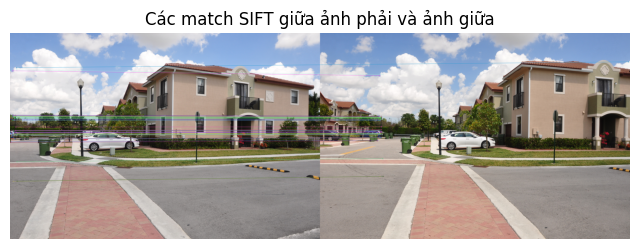

In [17]:
# Tìm match giữa ảnh phải và ảnh giữa
matches_right_mid = bf.knnMatch(des_right, des_middle, k=2)

# Lọc match bằng Lowe's ratio test
good_matches_rm = []
for m, n in matches_right_mid:
    if m.distance < ratio_thresh * n.distance:
        good_matches_rm.append(m)
print(f"Số match tốt giữa ảnh phải và ảnh giữa: {len(good_matches_rm)}")

# Tính homography (ảnh phải -> ảnh giữa)
if len(good_matches_rm) >= 4:
    pts_right = np.float32([kp_right[m.queryIdx].pt for m in good_matches_rm])
    pts_mid2  = np.float32([kp_middle[m.trainIdx].pt for m in good_matches_rm])
    H_right_to_mid, mask2 = cv2.findHomography(pts_right, pts_mid2, cv2.RANSAC)
    print("Homography (ảnh phải -> ảnh giữa):")
    print(H_right_to_mid)
else:
    H_right_to_mid = None
    print("Không đủ match để tính homography cho ảnh phải!")
    
# Vẽ 50 match tốt giữa ảnh phải và ảnh giữa
matches_draw2 = good_matches_rm[:50]
match_img2 = cv2.drawMatches(right_img, kp_right, middle_img, kp_middle, matches_draw2, None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(match_img2, cv2.COLOR_BGR2RGB))
plt.title("Các match SIFT giữa ảnh phải và ảnh giữa")
plt.axis('off')
plt.show()


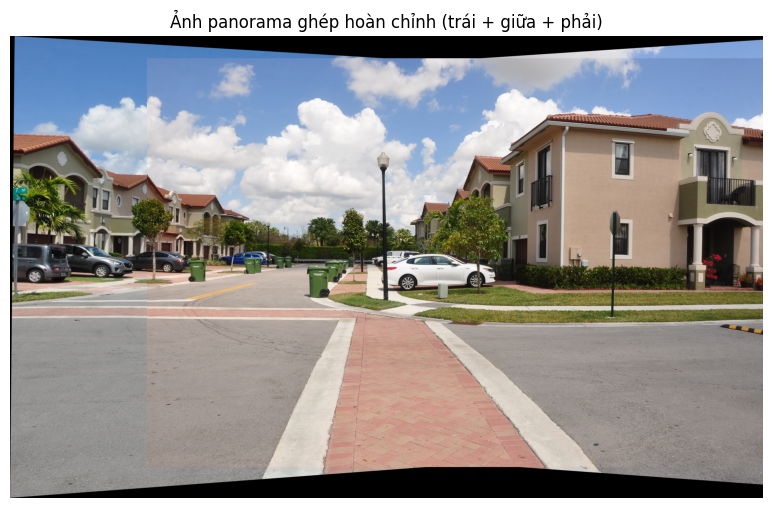

Đã lưu ảnh panorama kết quả tại: C:\Users\Public\panorama_sift_three_pictures\panorama_result.jpg


In [22]:
if H_right_to_mid is not None:
    # Warp ảnh phải với homography và offset_matrix đã tính trước (canvas chung)
    right_warp = cv2.warpPerspective(right_img, offset_matrix.dot(H_right_to_mid), (canvas_width, canvas_height))
    
    # Ghép ảnh phải vào panorama tạm thời (trái+giữa)
    panorama_full = panorama_left_mid.copy()
    mask_overlap2 = (panorama_full == 0) & (right_warp != 0)
    panorama_full[mask_overlap2] = right_warp[mask_overlap2]
    # Hiển thị ảnh panorama hoàn chỉnh
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(panorama_full, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh panorama ghép hoàn chỉnh (trái + giữa + phải)")
    plt.axis('off')
    plt.show()
    
    # Lưu ảnh panorama ra file
    save_path = rf"{image_dir}\panorama_result.jpg"
    cv2.imwrite(save_path, panorama_full)
    print("Đã lưu ảnh panorama kết quả tại:", save_path)
